In [4]:
library(rpart)
library(rpart.plot)

In [34]:
data <- read.csv('titanic.csv')
data$Pclass = as.factor(data$Pclass)

In [35]:
str(data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [105]:
subset = data[c(2,3,5,6,7,8,12)]
print(summary(subset$Embarked))
subset[subset$Embarked=='Q',]$Embarked[c(1:10)] <- NA
print(summary(subset$Embarked))

      C   Q   S 
  2 168  77 644 
        C    Q    S NA's 
   2  168   67  644   10 


In [106]:
head(subset)

Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22,1,0,S
1,1,female,38,1,0,C
1,3,female,26,0,0,S
1,1,female,35,1,0,S
0,3,male,35,0,0,S
0,3,male,NA,0,0,NA


In [107]:
unlist(lapply(subset, function(x) any(is.na(x))))

Survived   Pclass      Sex      Age    SibSp    Parch Embarked 
   FALSE    FALSE    FALSE     TRUE    FALSE    FALSE     TRUE

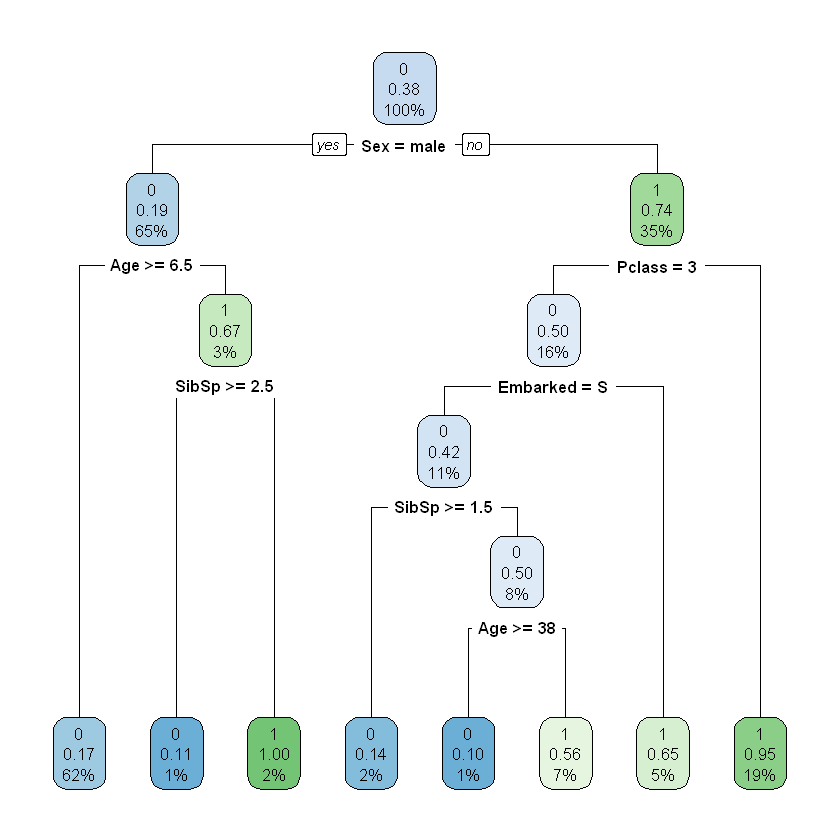

In [108]:
rpart(Survived ~ .,data=subset, method="class") -> dt
rpart.plot(dt)

In [109]:
summary(dt)

Call:
rpart(formula = Survived ~ ., data = subset, method = "class")
  n= 891 

          CP nsplit rel error    xerror       xstd
1 0.44444444      0 1.0000000 1.0000000 0.04244576
2 0.02339181      1 0.5555556 0.5555556 0.03574957
3 0.02192982      2 0.5321637 0.5643275 0.03595352
4 0.02046784      4 0.4883041 0.5643275 0.03595352
5 0.01169591      5 0.4678363 0.5175439 0.03482337
6 0.01000000      7 0.4444444 0.5146199 0.03474917

Variable importance
     Sex   Pclass    SibSp      Age    Parch Embarked 
      58       16        8        7        6        5 

Node number 1: 891 observations,    complexity param=0.4444444
  predicted class=0  expected loss=0.3838384  P(node) =1
    class counts:   549   342
   probabilities: 0.616 0.384 
  left son=2 (577 obs) right son=3 (314 obs)
  Primary splits:
      Sex      splits as  RL,       improve=124.426300, (0 missing)
      Pclass   splits as  RRL,      improve= 43.781830, (0 missing)
      Embarked splits as  RRLL,     improve= 13.434